# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd 
import numpy as np 


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [5]:
import pandas as pd

csv_file_path = 'C:\\Users\\David Santos\\Documents\\GitHub\\lab-pivot-table-correlation\\your_code\\data\\Employee.csv'


employee = pd.read_csv(csv_file_path)

employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [7]:
unique_departments = employee['Department'].unique()
print(unique_departments)

['IT' 'HR' 'Sales']


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [8]:
mean_salary_by_dept = employee.groupby('Department')['Salary'].mean() 

print(mean_salary_by_dept)


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [9]:
pivot_table = employee.pivot_table(index = 'Department', values = 'Salary', aggfunc = 'mean')

print(pivot_table)

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [11]:
pivot_table_2 = employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = 'mean')
print(pivot_table_2)

                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
pivot_table_3 = employee.pivot_table( index = 'Title', values = ['Salary','Years'], aggfunc = {'Salary': 'mean' , 'Years': 'count'})
print(pivot_table_3)

              Salary  Years
Title                      
VP         70.000000      2
analyst    32.500000      4
associate  56.666667      3


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [20]:
pivot_table_4 = employee.pivot_table ( index = ['Department', 'Title'],
                                        values = ['Salary','Years'],
                                        aggfunc = {'Salary':'mean', 'Years':'count', 'Department':'count'})   

pivot_table_4.columns = ['Mean Salary', 'Count of Employees', 'Count of Years']

print(pivot_table_4)

                      Mean Salary  Count of Employees  Count of Years
Department Title                                                     
HR         VP                   1                70.0               1
           analyst              2                32.5               2
IT         VP                   1                70.0               1
           analyst              2                32.5               2
           associate            1                60.0               1
Sales      associate            2                55.0               2


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [31]:
pivot_table_department = employee.pivot_table(
    index = 'Department',
    values = 'Salary',
    aggfunc = ['median', 'min', 'max', 'std']   
)

print("Salary Statistics by Department:")
print(pivot_table_department)

Salary Statistics by Department:
           median    min    max        std
           Salary Salary Salary     Salary
Department                                
HR           35.0     30     70  21.794495
IT           47.5     30     70  19.311050
Sales        55.0     55     55   0.000000


In [28]:
pivot_table_title = employee.pivot_table(
    index = 'Title',
    values = 'Salary',
    aggfunc = ['median', 'min', 'max', 'std']  
)

print("Salary Statistics by Title:")
print(pivot_table_title)

Salary Statistics by Title:
          median    min    max       std
          Salary Salary Salary    Salary
Title                                   
VP          70.0     70     70  0.000000
analyst     32.5     30     35  2.886751
associate   55.0     55     60  2.886751


#### Based on your comments, fill the missing values with an appropriate value.

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [33]:
department_summary = employee.groupby('Department').agg(
    num_employees = ('Salary', 'count'),
    total_salary = ('Salary', 'sum')
)

print("Department Summary:")
print(department_summary)

Department Summary:
            num_employees  total_salary
Department                             
HR                      3           135
IT                      4           195
Sales                   2           110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [36]:
department_title_summary = employee.groupby(['Department', 'Title']).agg(
    total_years = ('Years', 'sum'),
    mean_salary = ('Salary', 'mean')
)

print("Department and Title Summary:")
print(department_title_summary)

Department and Title Summary:
                      total_years  mean_salary
Department Title                              
HR         VP                   8         70.0
           analyst              6         32.5
IT         VP                   8         70.0
           analyst              3         32.5
           associate            7         60.0
Sales      associate            5         55.0


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [38]:
def costum_aggregation(x):
    max_value = x.max()
    filt_value = x[x < max_value]
    return filt_value.mean()


costum_pivot_table = employee.pivot_table(
    index = 'Department',
    values = 'Salary',
    aggfunc = costum_aggregation
)

print("Mean Salary after removing maxima by Department:")
print(costum_pivot_table)

Mean Salary after removing maxima by Department:
               Salary
Department           
HR          32.500000
IT          41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [40]:
csv_file_path_2 = 'C:\\Users\\David Santos\\Documents\\GitHub\\lab-pivot-table-correlation\\your_code\\data\\Fitbit.csv'


fitbit = pd.read_csv(csv_file_path_2)

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [43]:
fitbit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [44]:
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [46]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

print(correlation)

0.5714518481062612


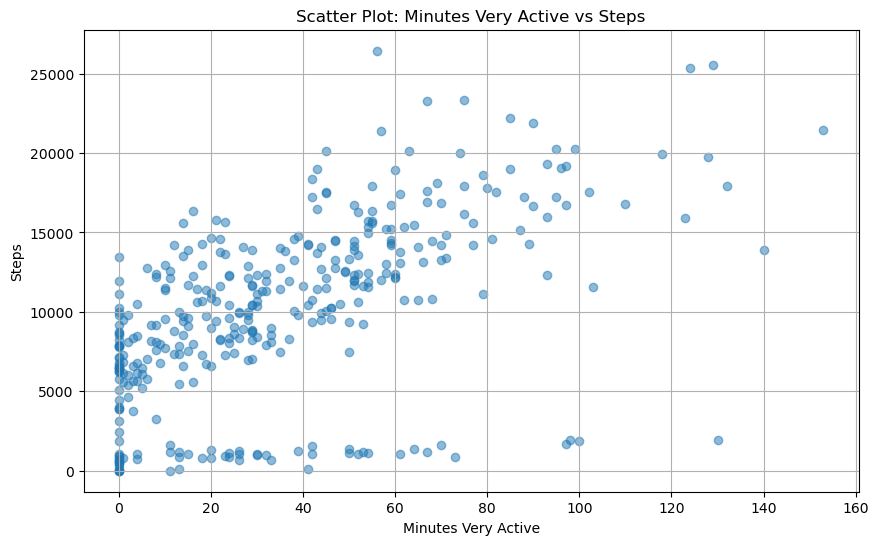

In [49]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'], alpha=0.5)
plt.title("Scatter Plot: Minutes Very Active vs Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.grid(True)
plt.show()

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

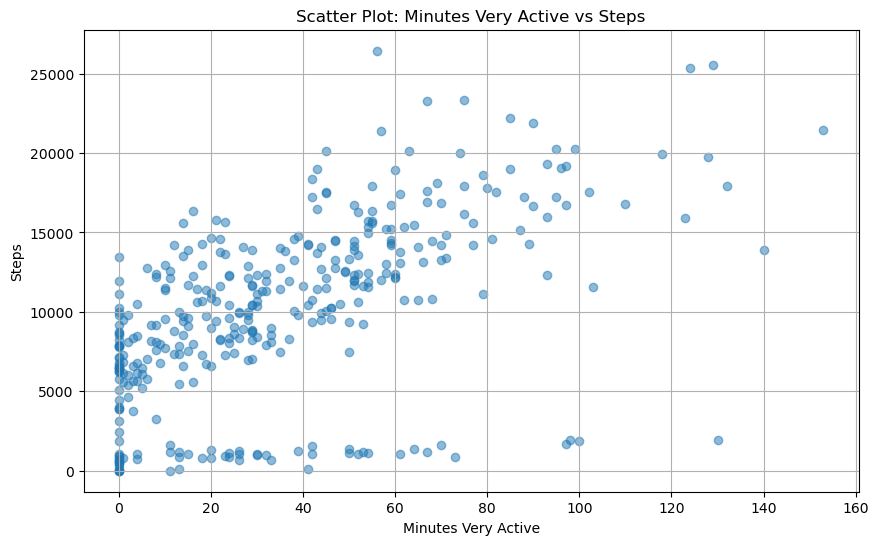

In [50]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'], alpha=0.5)
plt.title("Scatter Plot: Minutes Very Active vs Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# The more the value in steps increase so does the minutes very active


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [51]:
correlation_2 = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

print(correlation_2)


0.07690608062990098


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

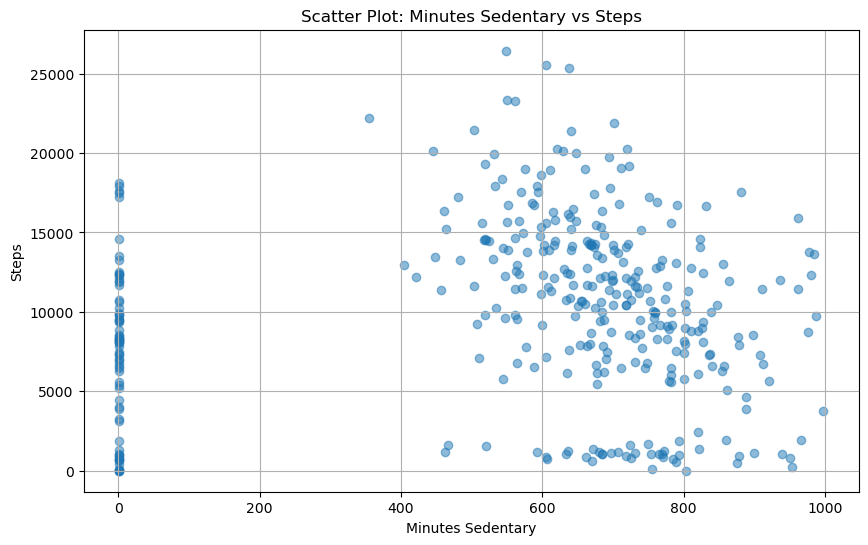

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'], alpha=0.5)
plt.title("Scatter Plot: Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


In [ ]:
#The bigger values in steps are from less sedentary people

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [53]:
correlation_3 = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

print(correlation_3)


0.1309856595083637


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

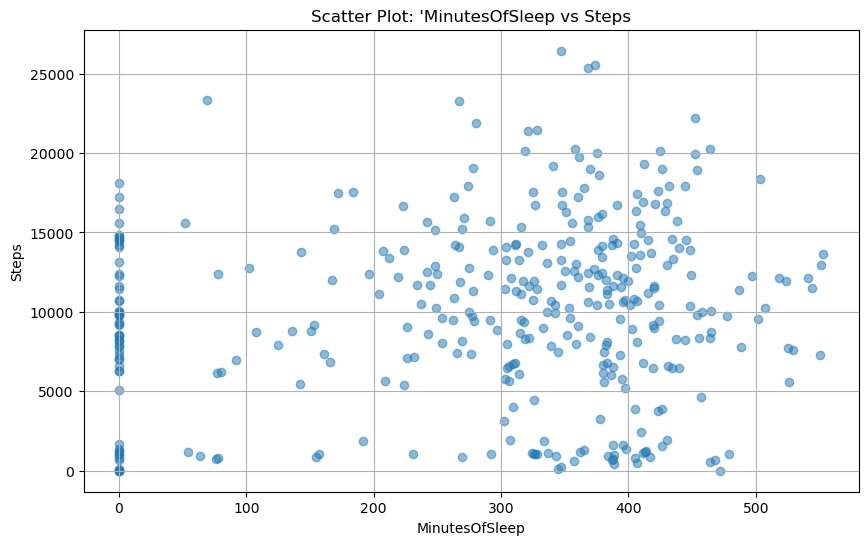

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'], alpha=0.5)
plt.title("Scatter Plot: 'MinutesOfSleep vs Steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.grid(True)
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [56]:
#specified columns 

select_columns = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[select_columns]

#compute corr matrix
cor_fit = subset.corr()

print(cor_fit)


                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [57]:
#correlation values for "Steps"

steps_correlation = cor_fit.loc['Steps'].sort_values(ascending = False)

print(steps_correlation)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [59]:
csv_file_path_3 = 'C:\\Users\\David Santos\\Documents\\GitHub\\lab-pivot-table-correlation\\your_code\\data\\Time_Grades.csv'


time_grades = pd.read_csv(csv_file_path_3)

time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

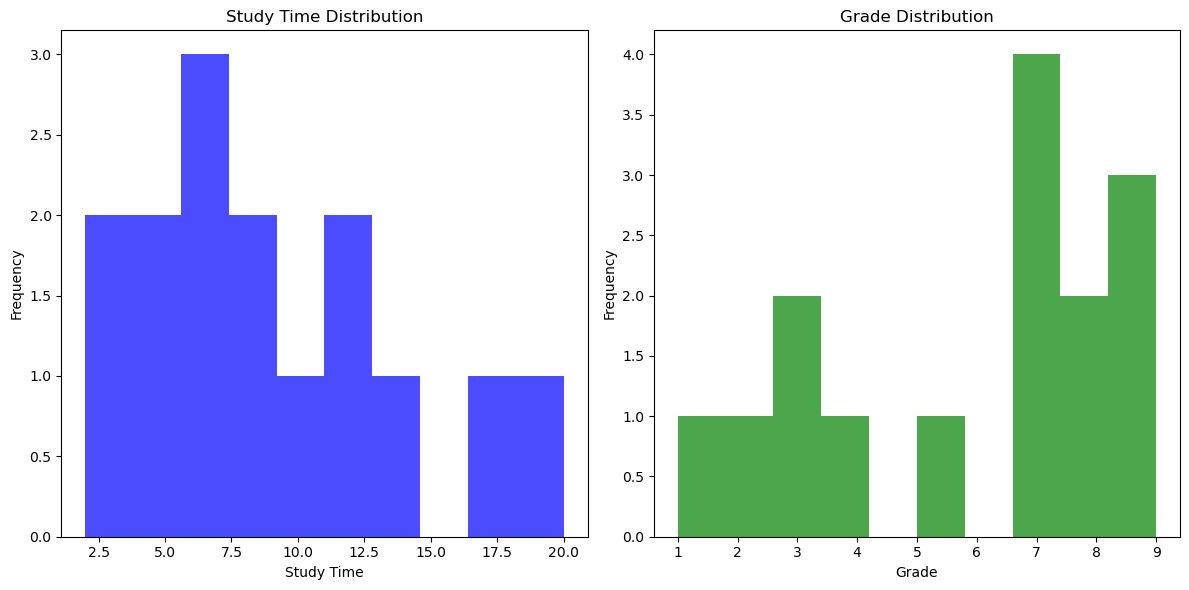

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Study Time distribution
axs[0].hist(time_grades["Study time"], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Study Time Distribution')
axs[0].set_xlabel('Study Time')
axs[0].set_ylabel('Frequency')

# Plot Grade distribution
axs[1].hist(time_grades["Grade"], bins=10, color='green', alpha=0.7)
axs[1].set_title('Grade Distribution')
axs[1].set_xlabel('Grade')
axs[1].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [65]:
#pearson

pearson_corr = time_grades["Study time"].corr(time_grades["Grade"], method = 'pearson')

#spearman 

spearman_corr =  time_grades["Study time"].corr(time_grades["Grade"], method = 'spearman')


print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)

Pearson Correlation: 0.7980456073578858
Spearman Correlation: 0.819658753036942


In [ ]:
# These correlation coeffiecients suggest a moderately strong positive correlation between "Study Time" and "Grade".

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

TypeError: text() missing 2 required positional arguments: 'y' and 's'

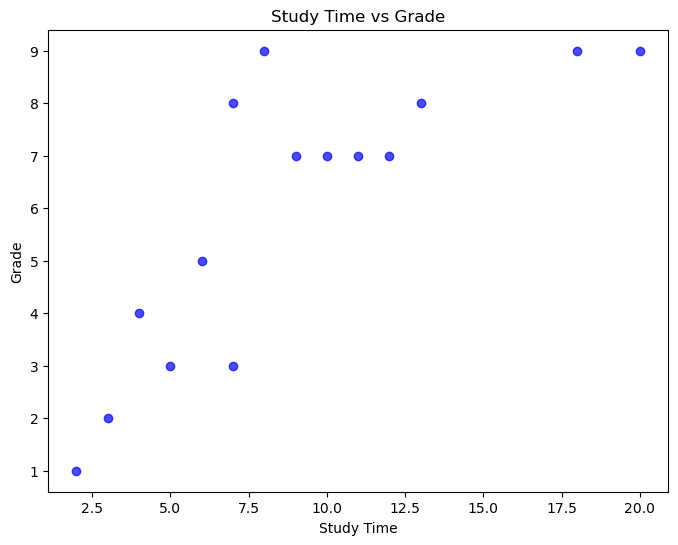

In [73]:
#pearson 

pearson_corr = time_grades["Study time"].corr(time_grades["Grade"], method = 'pearson')

#scatter pearson 

plt.figure(figsize=(8,6))
plt.scatter(time_grades["Study time"], time_grades["Grade"], color = 'blue', alpha = 0.7)
plt.title('Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')

plt.text(f"Pearson Correlation: {pearson_corr:.2f}", fontsize = 12)

plt.show()

TypeError: text() missing 2 required positional arguments: 'y' and 's'

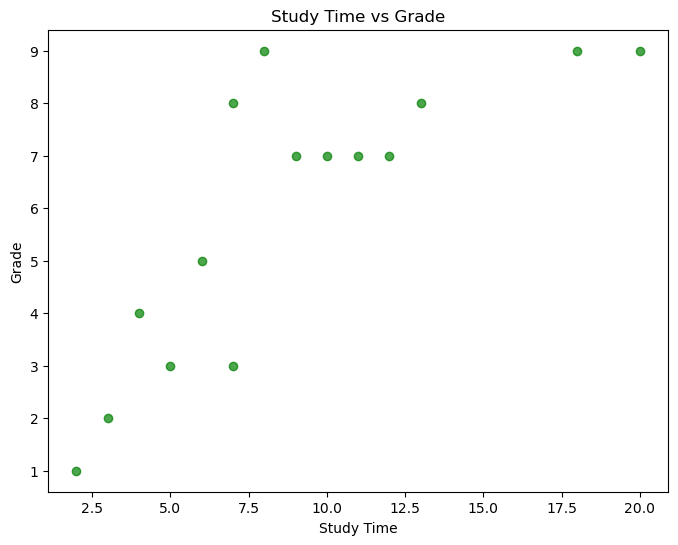

In [80]:
#spearman

spearman_corr = time_grades["Study time"].corr(time_grades["Grade"], method='spearman')

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(time_grades["Study time"], time_grades["Grade"], color='green', alpha=0.7)
plt.title('Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')

# Add correlation information to the plot
plt.text(f"Spearman Correlation: {spearman_corr:.2f}", fontsize=12)

# Show the plot
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# Basically Pearson correlation assumes that the variables are normally distributed and that the relationship between 
# them is linear. It is sensitive to outliers and can be influenced by extreme values.

#And Spearman correlation does not assume that the relationship is linear or that the data is normally distributed. Instead, it 
# computes the correlation based on the ranks of the data points. This makes it less sensitive to outliers 
# and more appropriate for assessing relationships in data that may not meet the assumptions of the Pearson correlation.
